In [125]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [127]:

# Function to download monthly stock prices
def obter_cotacoes_mensais(ticker, inicio, fim):
    dados = yf.download(ticker, start=inicio, end=fim, interval="1mo")
    
    # Handle multi-level column index if it exists
    if isinstance(dados.columns, pd.MultiIndex):
        close_prices = dados['Close'][ticker]  # Select the 'Close' column for the ticker
    else:
        close_prices = dados['Close']  # Single-level index case
    
    return close_prices

In [133]:
# Function to simulate monthly investments
def simular_investimento(cotacoes, aporte_mensal):
    quantidade_acoes = []
    total_aportado = 0
    patrimonio = []

    for preco in cotacoes:
        if not pd.isna(preco):
            acoes_compradas = aporte_mensal / preco
            quantidade_acoes.append(acoes_compradas)
            total_aportado += aporte_mensal
        else:
            quantidade_acoes.append(0)

        patrimonio.append(sum(quantidade_acoes) * preco)

    return quantidade_acoes, patrimonio, total_aportado

# Configurações iniciais
ticker = "BBAS3.SA"  # Exemplo: Itau Unibanco
inicio = "2010-01-01"  # Data de início
fim = "2023-12-31"  # Data final
aporte_mensal = 1000  # Valor do aporte mensal

# Obter as cotações
cotacoes = obter_cotacoes_mensais(ticker, inicio, fim)

# Simular os aportes
quantidade_acoes, patrimonio, total_aportado = simular_investimento(cotacoes, aporte_mensal)

[*********************100%***********************]  1 of 1 completed

Quantidades de Acoes: R$ [196.5141460720494, 185.49032986139827, 182.10611075851293, 180.01650847192255, 207.80207024033237, 215.8132405050343, 174.19097189690103, 186.79061230102943, 164.46067200645436, 158.58401768934348, 159.54793615319386, 166.4137181620941, 174.53758590484355, 174.59630548692186, 173.90798139974584, 175.95253099480814, 181.84908296434315, 181.12437350579984, 190.96122293011263, 187.95957468109015, 200.4836496736665, 190.14750097016253, 203.5050204455806, 206.7430821256696, 178.04856782322494, 175.08644527559255, 185.51038061901133, 201.95785732947473, 238.10825181148417, 243.14726862335982, 214.65800099409032, 201.87851817853124, 187.68655985089262, 212.36446797442778, 210.03832295603556, 178.84391460527823, 185.2359865265382, 171.59298671662168, 168.02075006012896, 175.4929513348213, 174.45659710509554, 200.11880298123916, 192.3822516981067, 189.21073534756133, 162.7138043694917, 139.54938994985835, 161.41505407628136, 169.70289014553254, 195.65480038359368, 197.

Total aportado: R$168,000.00
Valor final do patrimônio: R$549,614.27


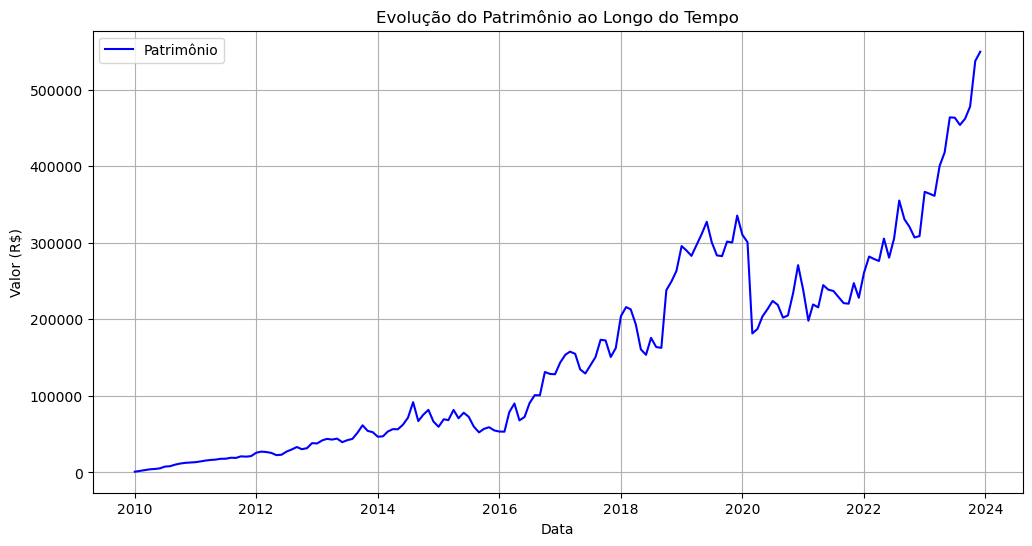

In [134]:

# Exibir resultados
resultado = pd.DataFrame({
    "Data": cotacoes.index,
    "Preco Ação": cotacoes.values,
    "Patrimônio": patrimonio
})
resultado.set_index("Data", inplace=True)

print(f"Total aportado: R${total_aportado:,.2f}")
print(f"Valor final do patrimônio: R${patrimonio[-1]:,.2f}")

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(resultado.index, resultado["Patrimônio"], label="Patrimônio", color="blue")
plt.title("Evolução do Patrimônio ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Valor (R$)")
plt.legend()
plt.grid()
plt.show()
